In [80]:
#Install the latest version of Vertex SDK for Python.
import os

# Google Cloud Notebook
if os.path.exists("/opt/deeplearning/metadata/env_version"):
    USER_FLAG = "--user"
else:
    USER_FLAG = ""

!pip3 install --quiet --upgrade google-cloud-aiplatform $USER_FLAG

In [81]:
#Install the latest GA version of google-cloud-storage library as well.
!pip3 install --quiet -U google-cloud-storage $USER_FLAG

In [51]:
#Restart the kernel
#Once you've installed the additional packages, you need to restart the notebook kernel so it can find the packages.
import os

if not os.getenv("IS_TESTING"):
    # Automatically restart kernel after installs
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

In [82]:
#Set ProjectID
PROJECT_ID = "layodemo" 
PROJECT_ID

'layodemo'

In [83]:
! gcloud config set project $PROJECT_ID

Updated property [core/project].


In [84]:
REGION = "us-central1"

In [85]:
BUCKET_NAME="gs://rdemo/"

In [86]:
#Finally, validate access to your Cloud Storage bucket by examining its contents
! gsutil ls -al $BUCKET_NAME

  30479574  2021-11-30T02:15:54Z  gs://rdemo/external_ready_visible MCH.csv#1638238554173951  metageneration=1
TOTAL: 1 objects, 30479574 bytes (29.07 MiB)


In [87]:
import google.cloud.aiplatform as aip

In [88]:
#Initialize the Vertex SDK for Python for your project and corresponding bucket
aip.init(project=PROJECT_ID, staging_bucket=BUCKET_NAME)

In [97]:
#Now set the variable IMPORT_FILE to the location of the CSV index file in Cloud Storage
IMPORT_FILE = "gs://rdemo/sample_file.csv"

In [98]:
import pandas as pd
df=pd.read_csv("gs://rdemo/external_ready_visible MCH.csv")
# drop function which is used in removing or deleting rows or columns from the CSV files
#df.drop('Protected_class', inplace=True, axis=1)
df = df.dropna()
df.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,Var27,Var28,Var29,Var30,Var31,Var32,Protected_class,Var33,Var34,Var35
0,YES,N,N,0,0,0,1,0,0.0,0.0,...,1,0,0.0,0.0,0.685217,N,Level5,Level4,Level1,Level3
2,YES,N,N,0,1,0,0,0,0.0,0.0,...,2,0,0.0,0.0,0.255147,N,Level7,Level2,Level1,Level3
3,YES,N,N,1,0,0,0,2,0.0,50.0,...,1,0,0.0,0.0,0.366125,N,Level5,Level1,Level3,Level2
4,YES,N,N,0,1,0,0,1,0.0,90000.0,...,5,0,0.0,0.0,0.793722,N,Level6,Level2,Level2,Level2
5,YES,N,N,0,1,0,0,0,0.0,0.0,...,11,10,0.0,500.0,0.713145,N,Level9,Level2,Level1,Level3


In [99]:
df['Var33'] = df['Var33'].map(lambda x: x.lstrip('Level'))
df['Var34'] = df['Var34'].map(lambda x: x.lstrip('Level'))
df['Var35'] = df['Var35'].map(lambda x: x.lstrip('Level'))
df['Protected_class'] = df['Protected_class'].map(lambda x: x.lstrip('Level'))
df['var1'] = df['var1'].replace('YES', 1)
df['var1'] = df['var1'].replace('NO', 0)
df['var2'] = df['var2'].replace('Y', 1)
df['var2'] = df['var2'].replace('N', 0)
df['var3'] = df['var3'].replace('Y', 1)
df['var3'] = df['var3'].replace('N', 0)
df['Var32'] = df['Var32'].replace('Y', 1)
df['Var32'] = df['Var32'].replace('N', 0)
df.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,Var27,Var28,Var29,Var30,Var31,Var32,Protected_class,Var33,Var34,Var35
0,1,0,0,0,0,0,1,0,0.0,0.0,...,1,0,0.0,0.0,0.685217,0,5,4,1,3
2,1,0,0,0,1,0,0,0,0.0,0.0,...,2,0,0.0,0.0,0.255147,0,7,2,1,3
3,1,0,0,1,0,0,0,2,0.0,50.0,...,1,0,0.0,0.0,0.366125,0,5,1,3,2
4,1,0,0,0,1,0,0,1,0.0,90000.0,...,5,0,0.0,0.0,0.793722,0,6,2,2,2
5,1,0,0,0,1,0,0,0,0.0,0.0,...,11,10,0.0,500.0,0.713145,0,9,2,1,3


In [100]:
df["Protected_class"] = df["Protected_class"].astype(str).astype(int)
df["Var33"] = df["Var33"].astype(str).astype(int)
df["Var34"] = df["Var34"].astype(str).astype(int)
df["Var35"] = df["Var35"].astype(str).astype(int)
df.to_csv('gs://rdemo/sample_file.csv', index=False)

In [101]:
df1 = df[['Var29', 'var11','var12','var13','Var28','var9','Protected_class','Response']]


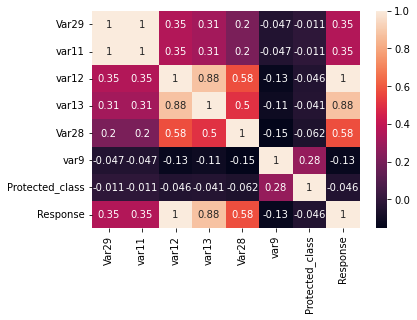

In [102]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [103]:
heading = ! gsutil cat "gs://rdemo/external_ready_visible MCH.csv"| head -n1
heading

['var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,Response,Var14,var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Protected_class,Var33,Var34,Var35']

In [104]:
label_column = str(heading).split(",")[13].split("'")[0]
label_column

'Response'

In [106]:
dataset = aip.TabularDataset.create(
    display_name="Sample_Dataset", gcs_source=[IMPORT_FILE]
)

print(dataset.resource_name)

INFO:google.cloud.aiplatform.datasets.dataset:Creating TabularDataset
INFO:google.cloud.aiplatform.datasets.dataset:Create TabularDataset backing LRO: projects/320177532135/locations/us-central1/datasets/315102440334557184/operations/1301455698634211328
INFO:google.cloud.aiplatform.datasets.dataset:TabularDataset created. Resource name: projects/320177532135/locations/us-central1/datasets/315102440334557184
INFO:google.cloud.aiplatform.datasets.dataset:To use this TabularDataset in another session:
INFO:google.cloud.aiplatform.datasets.dataset:ds = aiplatform.TabularDataset('projects/320177532135/locations/us-central1/datasets/315102440334557184')
projects/320177532135/locations/us-central1/datasets/315102440334557184


In [108]:
#The instantiated object is the DAG (directed acyclic graph) for the training pipeline.
dag = aip.AutoMLTabularTrainingJob(
    display_name="sample_data",
    optimization_prediction_type="classification",
    optimization_objective="minimize-log-loss",
)

print(dag)

In [ ]:
#Next, you run the DAG to start the training job by invoking the method run
model = dag.run(
    dataset=dataset,
    model_display_name="sample_data",
    training_fraction_split=0.6,
    validation_fraction_split=0.2,
    test_fraction_split=0.2,
    budget_milli_node_hours=1000,
    disable_early_stopping=False,
    target_column=label_column,
)

INFO:google.cloud.aiplatform.training_jobs:No column transformations provided, so now retrieving columns from dataset in order to set default column transformations.
INFO:google.cloud.aiplatform.training_jobs:The column transformation of type 'auto' was set for the following columns: ['var6', 'Var35', 'var15', 'Var27', 'Var22', 'var10', 'Var26', 'Var29', 'var12', 'Var34', 'Var19', 'var7', 'var11', 'var4', 'Var28', 'var9', 'Var33', 'Var24', 'Var30', 'var3', 'var1', 'Var14', 'Var18', 'Var25', 'Var21', 'Var23', 'var13', 'Var31', 'Var32', 'Protected_class', 'Var17', 'var5', 'Var20', 'var8', 'Var16', 'var2'].
INFO:google.cloud.aiplatform.training_jobs:View Training:
https://console.cloud.google.com/ai/platform/locations/us-central1/training/1800191905250672640?project=320177532135
INFO:google.cloud.aiplatform.training_jobs:AutoMLTabularTrainingJob projects/320177532135/locations/us-central1/trainingPipelines/1800191905250672640 current state:
PipelineState.PIPELINE_STATE_RUNNING
INFO:google

In [ ]:
endpoint = model.deploy(machine_type="n1-standard-4")

In [ ]:
INSTANCE = {
    "var1" : "1",
    "var2" : "0",
    "var3" : "0",
    "var4" : "1",
    "var5" : "0",
    "var6" : "0",
    "var7" : "0",
    "var8" : "0",
    "var9" : "0",
    "var10" : "0",
    "var11" : "0",
    "var12" : "0",
    "var13" : "0",
    "var14" : "",
    "var15" : "0",
    "var16" : "0",
    "var17" : "0",
    "var18" : "0",
    "var19" : "0",
    "var20" : "0",
    "var21" : "0",
    "var22" : "0",
    "var23" : "0",
    "var24" : "0",
    "var25" : "0",
    "var26" : "1700",
    "var27" : "3",
    "var28" : "0",
    "var29" : "0",
    "var30" : "0",
    "var31" : "0.864593505",
    "var32" : "0",
    "Protected_class” : "3",
    "var33" : "1",
    "var34" : "1",
    "var35" : "3",}

In [ ]:
instances_list = [INSTANCE]

prediction = endpoint.predict(instances_list)
print(prediction)

In [ ]:
explanations = m.explain(instances_list)